                                time   magnitude   longitude    latitude  \
count                            492  492.000000  492.000000  492.000000   
mean   2023-08-15 07:29:14.622050560    4.800772   24.556356   -0.017742   
min       2023-08-01 02:20:46.066000    4.500000 -179.931400  -62.177500   
25%    2023-08-07 00:07:31.091749888    4.500000  -75.063325  -21.994050   
50%    2023-08-15 00:00:27.827500032    4.700000   70.097650   -1.305250   
75%    2023-08-22 19:23:30.149750016    4.900000  129.117575   21.743200   
max       2023-08-31 21:43:25.888000    7.100000  179.899300   83.475200   
std                              NaN    0.375329  119.982102   29.960864   

            depth  
count  492.000000  
mean    73.788683  
min      2.963000  
25%     10.000000  
50%     25.064500  
75%     71.293500  
max    646.537000  
std    125.042290  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column     Non-Null Count 

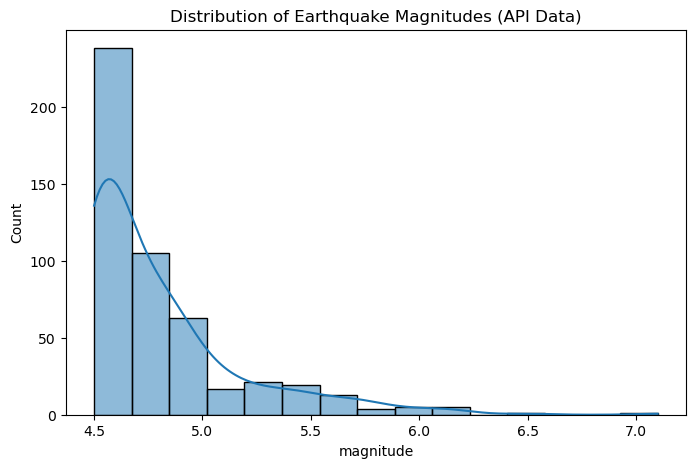

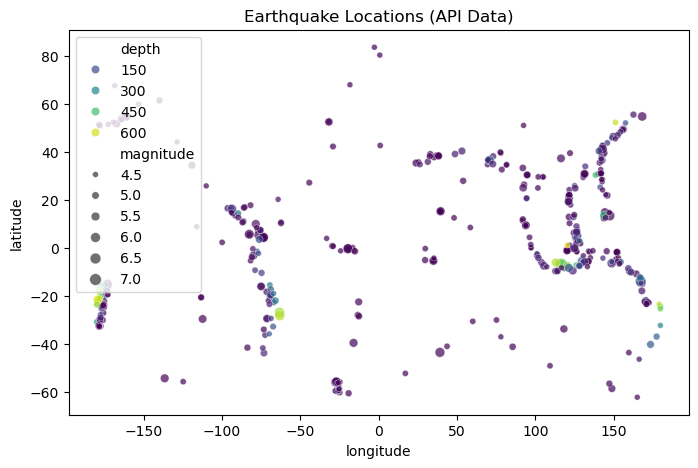

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch earthquake data from USGS API
url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
params = {
    "format": "geojson",
    "starttime": "2023-08-01",
    "endtime": "2023-09-01",
    "minmagnitude": 4.5
}
response = requests.get(url, params=params).json()

records = []
for feat in response['features']:
    props = feat['properties']
    geom = feat['geometry']
    records.append({
        "time": pd.to_datetime(props['time'], unit='ms'),
        "place": props['place'],
        "magnitude": props['mag'],
        "longitude": geom['coordinates'][0],
        "latitude": geom['coordinates'][1],
        "depth": geom['coordinates'][2]
    })
df_api = pd.DataFrame(records)

#  EDA
print(df_api.describe())
print(df_api.info())

# Visualizations
plt.figure(figsize=(8,5))
sns.histplot(df_api['magnitude'], bins=15, kde=True)
plt.title("Distribution of Earthquake Magnitudes (API Data)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(data=df_api, x="longitude", y="latitude", size="magnitude", hue="depth", alpha=0.7, palette="viridis")
plt.title("Earthquake Locations (API Data)")
plt.show()

                                Date      Latitude     Longitude  \
count                          17390  17390.000000  17390.000000   
mean   1953-11-03 04:00:34.568808576     15.275796     43.289143   
min       1904-04-04 10:02:34.560000    -69.722000   -179.991000   
25%    1936-04-19 19:21:41.915000064     -6.198700    -69.118400   
50%       1957-09-26 23:27:39.720000     19.687000     85.331000   
75%       1969-03-25 15:44:48.360000     39.332750    141.752750   
max       2023-08-31 21:43:25.888000     87.199000    179.999000   
std                              NaN     29.711839    112.887037   

              Depth     Magnitude  
count  17390.000000  17390.000000  
mean      40.581588      5.882094  
min       -4.000000      4.500000  
25%       15.000000      5.520000  
50%       20.000000      5.830000  
75%       35.000000      6.200000  
max      665.000000      9.500000  
std       76.053312      0.573915  
Missing values: Date         0
Latitude     0
Longitude    0
De

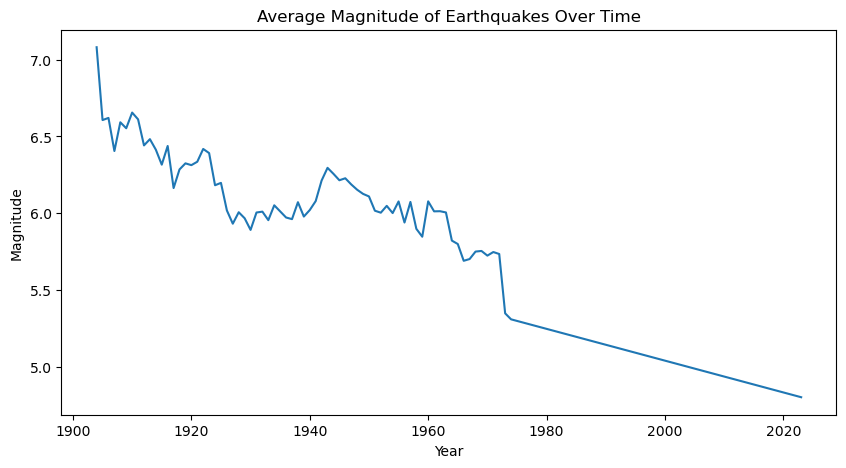

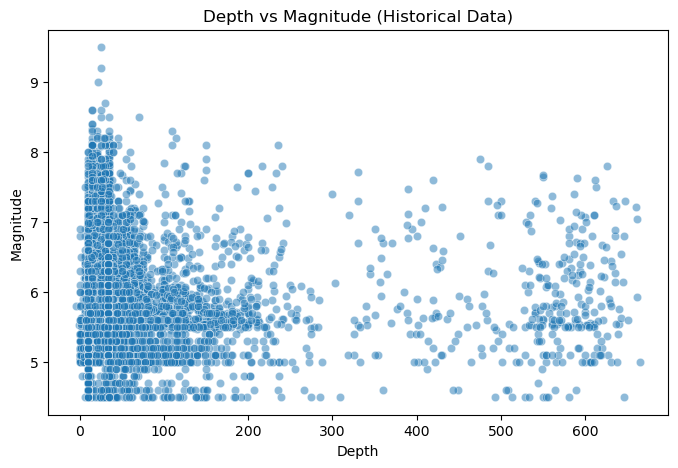

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load a historical dataset (Kaggle/NOAA/USGS archive)
df_hist = pd.read_csv(r"D:/Earthquake_impact_prediction/Significant_Earthquakes.csv")

# Select & clean - using the correct column names from your dataset
df_hist = df_hist[['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location']]
df_hist['Date'] = pd.to_datetime(df_hist['Date'], errors='coerce')
df_hist = df_hist.dropna()

# Rename columns to more descriptive names (optional but recommended)
df_hist = df_hist.rename(columns={
    'Date': 'Date',
    'Latitude': 'Latitude',
    'Longitude': 'Longitude',
    'Depth': 'Depth',
    'Magnitude': 'Magnitude',
    'Location': 'Location'
})

# --- EDA ---
print(df_hist.describe())
print("Missing values:", df_hist.isnull().sum())

# Time series trend
df_hist['Year'] = df_hist['Date'].dt.year
plt.figure(figsize=(10,5))
sns.lineplot(data=df_hist.groupby('Year')['Magnitude'].mean().reset_index(), x='Year', y='Magnitude')
plt.title("Average Magnitude of Earthquakes Over Time")
plt.show()

# Magnitude vs Depth
plt.figure(figsize=(8,5))
sns.scatterplot(data=df_hist, x="Depth", y="Magnitude", alpha=0.5)
plt.title("Depth vs Magnitude (Historical Data)")
plt.show()

Setting CRS to EPSG:4326 (WGS84)
Soil data loaded successfully!
Columns: ['SNUM', 'FAOSOIL', 'DOMSOI', 'PHASE1', 'PHASE2', 'MISCLU1', 'MISCLU2', 'PERMAFROST', 'CNTCODE', 'CNTNAME', 'SQKM', 'COUNTRY', 'geometry']
Number of soil types: 34112
CRS: EPSG:4326

First few rows:
   SNUM FAOSOIL DOMSOI PHASE1 PHASE2 MISCLU1 MISCLU2 PERMAFROST  CNTCODE  \
0  3479  Rx1-2c     Rx   None   None       0       0          1       85   
1  6998      GL     GL   None   None       0       0          1       85   
2  6998      GL     GL   None   None       0       0          1       85   
3  6998      GL     GL   None   None       0       0          1       85   
4  3479  Rx1-2c     Rx   None   None       0       0          1       85   

  CNTNAME    SQKM    COUNTRY  \
0      GL  4194.0  GREENLAND   
1      GL  8798.0  GREENLAND   
2      GL   659.0  GREENLAND   
3      GL    69.0  GREENLAND   
4      GL   204.0  GREENLAND   

                                            geometry  
0  POLYGON ((-34.67598 

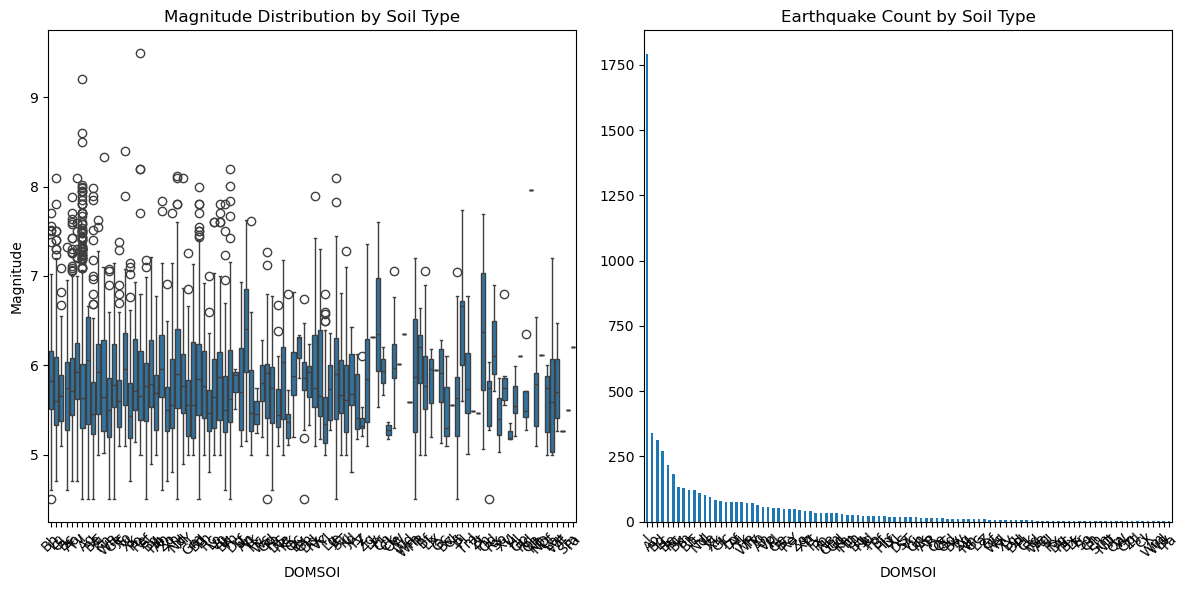

C:\Users\bange\AppData\Local\Temp\ipykernel_10792\490983502.py:104: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


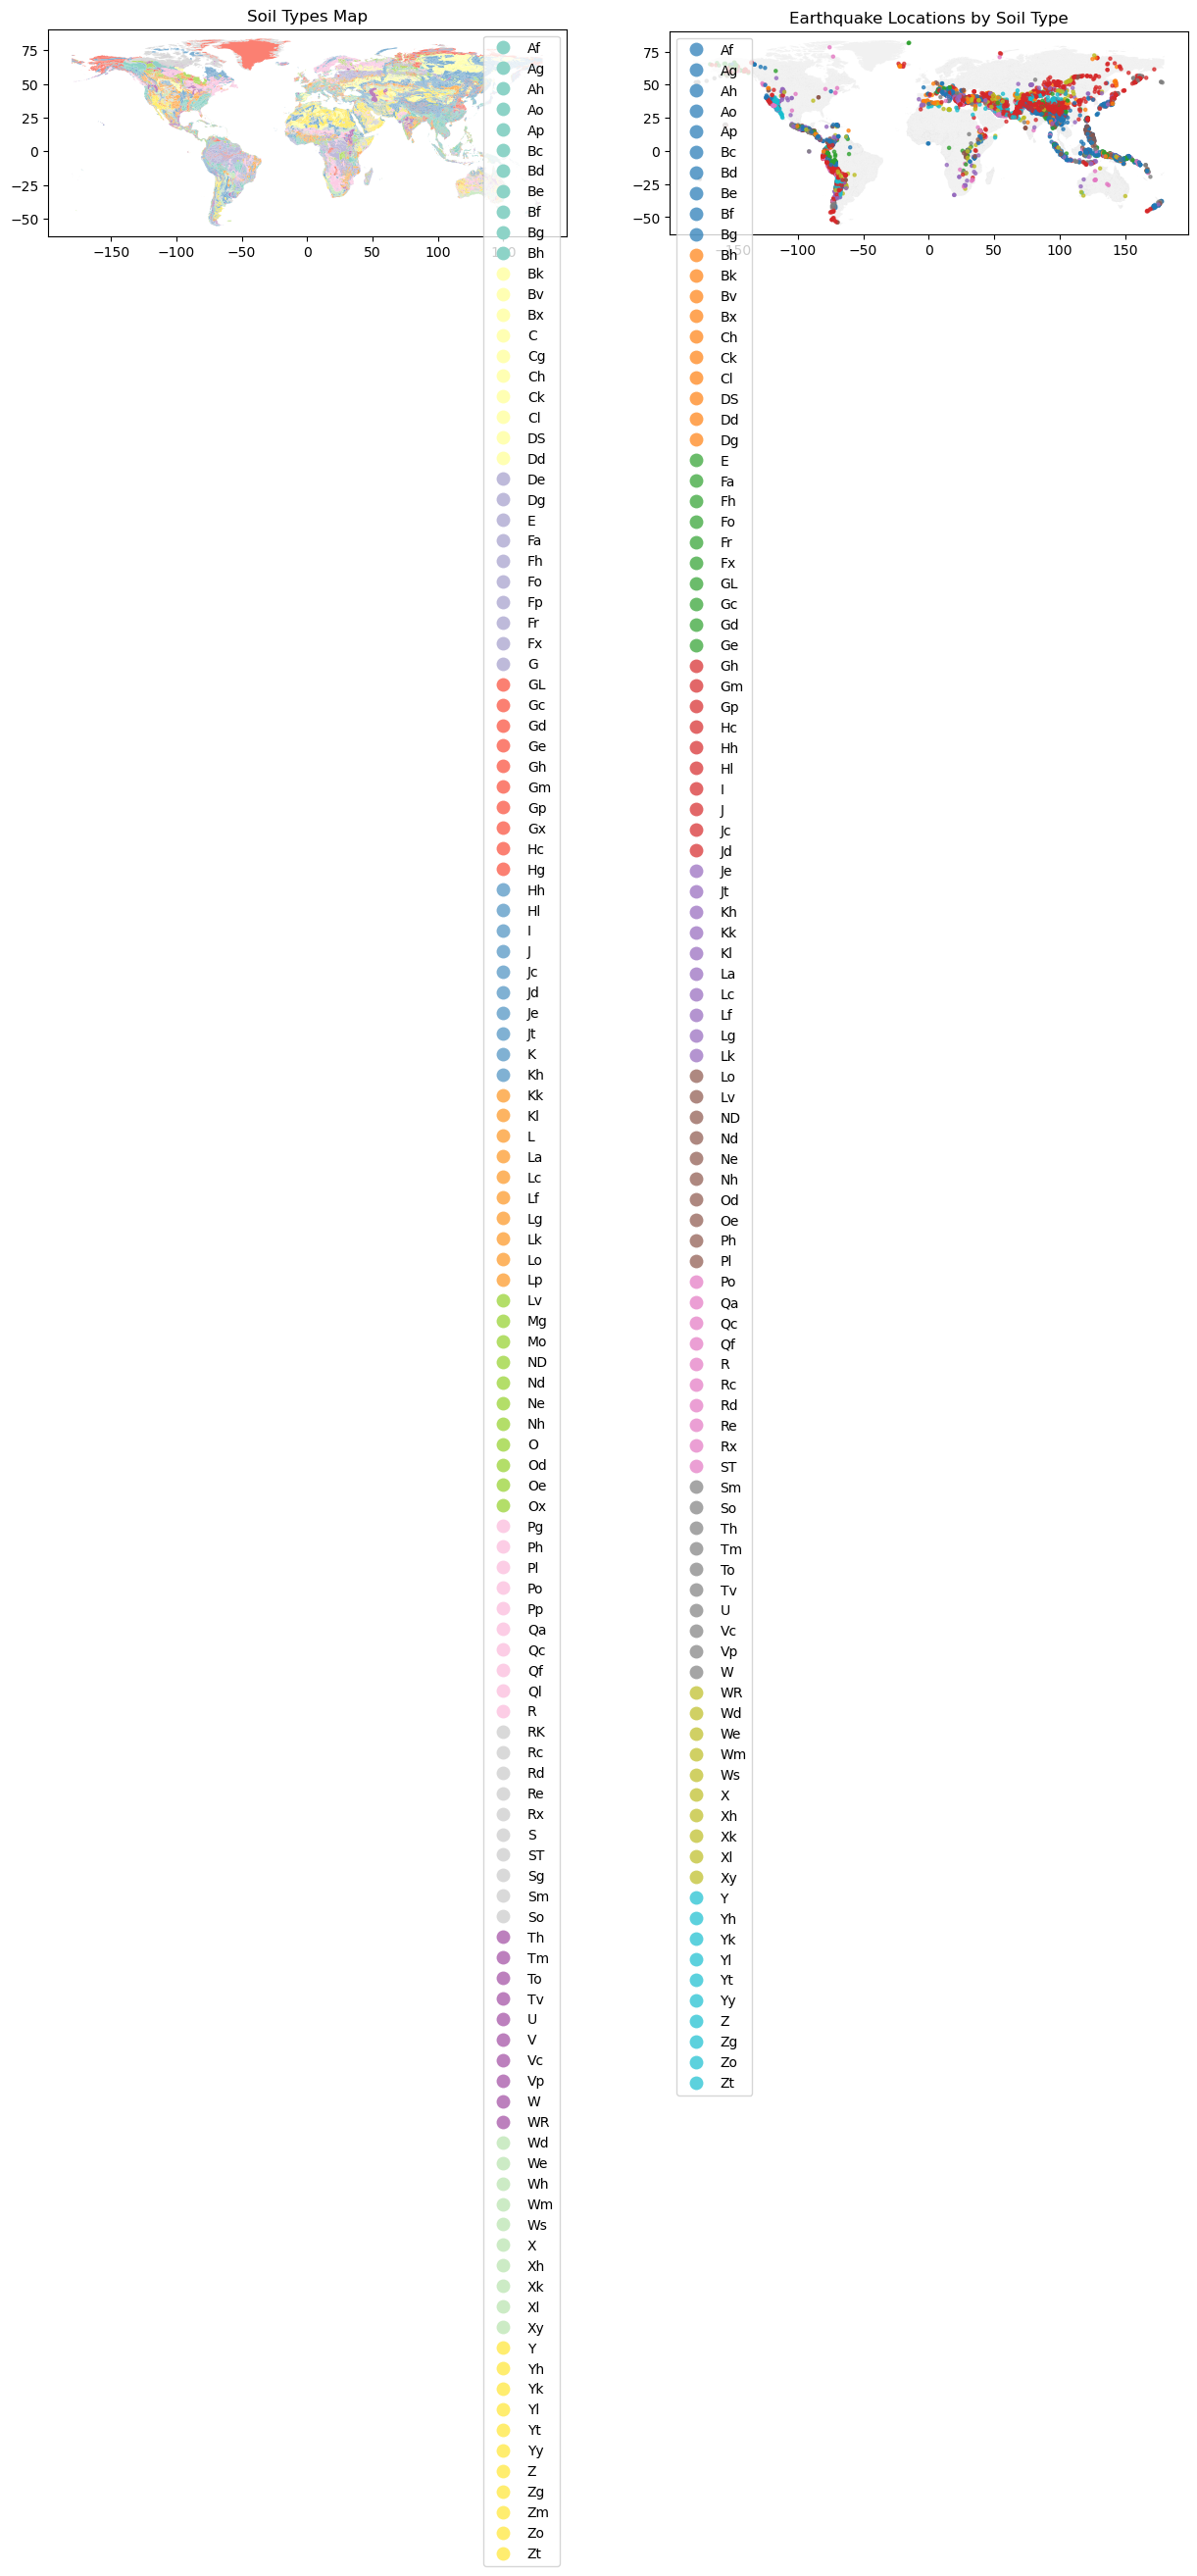


Statistical summary by soil type:
        count      mean       std   min   max
DOMSOI                                       
Af         75  5.742400  0.600067  4.50  7.18
Ag          4  5.820000  0.991699  4.50  6.66
Ah         57  6.003860  0.661024  4.60  7.84
Ao        338  5.832041  0.578839  4.70  7.88
Ap         15  6.424000  0.748673  5.15  7.63
...       ...       ...       ...   ...   ...
Yy         10  5.567000  0.367516  5.17  6.13
Z           8  5.430000  0.285757  5.21  6.10
Zg         10  5.928000  0.702579  5.10  7.36
Zo         45  5.593778  0.469300  4.70  6.91
Zt          1  5.470000       NaN  5.47  5.47

[100 rows x 5 columns]


In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from shapely.geometry import Point

def load_soil_data(shapefile_path):
    """Load soil data with error handling"""
    try:
        # Load the shapefile
        soil_data = gpd.read_file(shapefile_path)


        if soil_data.crs is None:
            soil_data = soil_data.set_crs("EPSG:4326")
            print("Setting CRS to EPSG:4326 (WGS84)")

        return soil_data

    except Exception as e:
        print(f"Error loading shapefile: {e}")
        return None

# Load soil data
soil_data = load_soil_data("D:/Earthquake_impact_prediction/DSMW/DSMW.shp")

if soil_data is not None:
    print("Soil data loaded successfully!")
    print(f"Columns: {soil_data.columns.tolist()}")
    print(f"Number of soil types: {len(soil_data)}")
    print(f"CRS: {soil_data.crs}")
    print("\nFirst few rows:")
    print(soil_data.head())

    # Check available columns for soil classification
    # Common column names in FAO DSMW:
    possible_soil_columns = ['SU_SYM90', 'DOMSOI', 'SU_SYM85', 'SOIL', 'CODE']
    available_soil_cols = [col for col in possible_soil_columns if col in soil_data.columns]
    print(f"\nAvailable soil columns: {available_soil_cols}")

    if available_soil_cols:
        soil_column = available_soil_cols[0]  # Using the first available soil column
        print(f"Using soil column: {soil_column}")

        # Convert earthquake data to GeoDataFrame
        eq_points = gpd.GeoDataFrame(
            df_hist,
            geometry=gpd.points_from_xy(df_hist.Longitude, df_hist.Latitude),
            crs="EPSG:4326"
        )

        # Ensure both datasets have the same CRS
        soil_data = soil_data.to_crs(eq_points.crs)

        print(f"Earthquake points: {len(eq_points)}")
        print(f"Soil polygons: {len(soil_data)}")

        # Spatial join - find which soil polygon contains each earthquake point
        eq_with_soil = gpd.sjoin(
            eq_points,
            soil_data[[soil_column, 'geometry']],
            how="left",
            predicate='within'
        )

        # Check results
        print(f"\nEarthquakes with soil data: {len(eq_with_soil)}")
        print(f"Earthquakes without soil data (NaN): {eq_with_soil[soil_column].isna().sum()}")

        # EDA Analysis
        print(f"\nSoil type distribution:")
        print(eq_with_soil[soil_column].value_counts())

        # Magnitude distribution by soil type
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        sns.boxplot(data=eq_with_soil, x=soil_column, y="Magnitude")
        plt.title("Magnitude Distribution by Soil Type")
        plt.xticks(rotation=45)

        plt.subplot(1, 2, 2)
        soil_counts = eq_with_soil[soil_column].value_counts()
        soil_counts.plot(kind='bar')
        plt.title("Earthquake Count by Soil Type")
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

        # Map visualization
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

        # Plot 1: Soil map
        soil_data.plot(column=soil_column, ax=ax1, legend=True, cmap='Set3')
        ax1.set_title("Soil Types Map")

        # Plot 2: Earthquakes over soil types
        soil_data.plot(ax=ax2, color='lightgrey', alpha=0.3)
        eq_with_soil.plot(ax=ax2, column=soil_column, legend=True,
                         markersize=5, alpha=0.7)
        ax2.set_title("Earthquake Locations by Soil Type")

        plt.tight_layout()
        plt.show()

        # Statistical summary
        print("\nStatistical summary by soil type:")
        stats_by_soil = eq_with_soil.groupby(soil_column)['Magnitude'].agg(['count', 'mean', 'std', 'min', 'max'])
        print(stats_by_soil)

    else:
        print("No standard soil classification columns found.")
        print("Available columns:", soil_data.columns.tolist())

else:
    print("Failed to load soil data.")

    # Debug: Check if files are accessible
    dataset_dir = "D:/Earthquake_impact_prediction/DSMW/DSMW.shp"
    if os.path.exists(dataset_dir):
        files = os.listdir(dataset_dir)
        print(f"Files in directory: {files}")
    else:
        print(f"Directory does not exist: {dataset_dir}")


Missing values per column:
Date               0
Latitude           0
Longitude          0
Depth              0
Magnitude          0
Location           0
Year               0
geometry           0
index_right    11588
DOMSOI         11588
dtype: int64


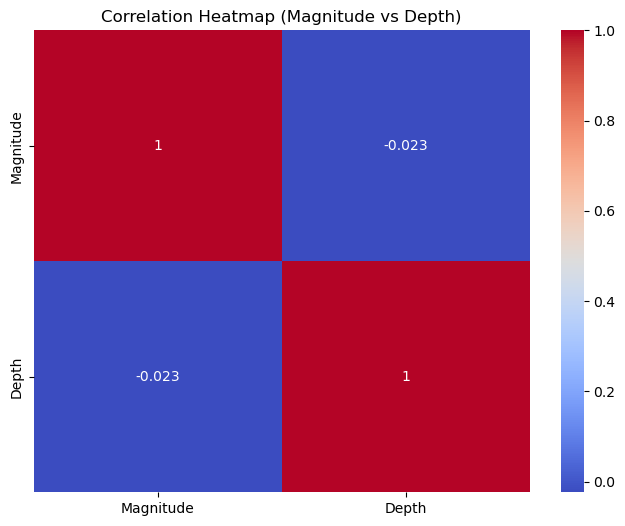

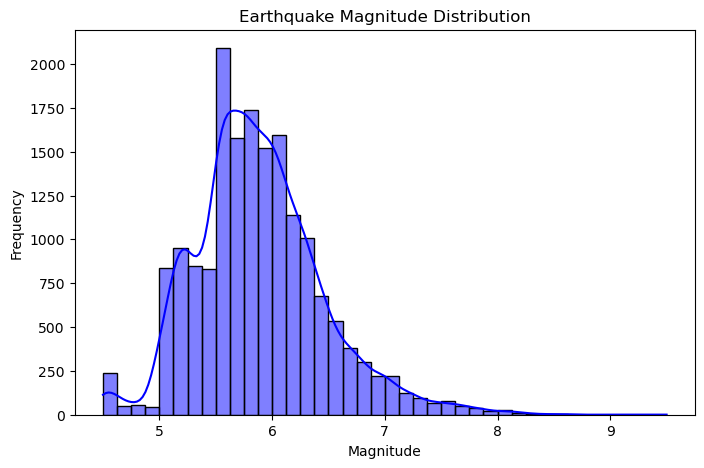

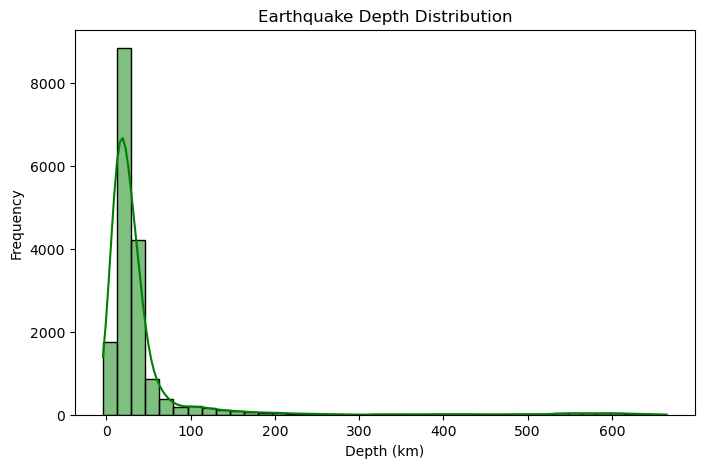

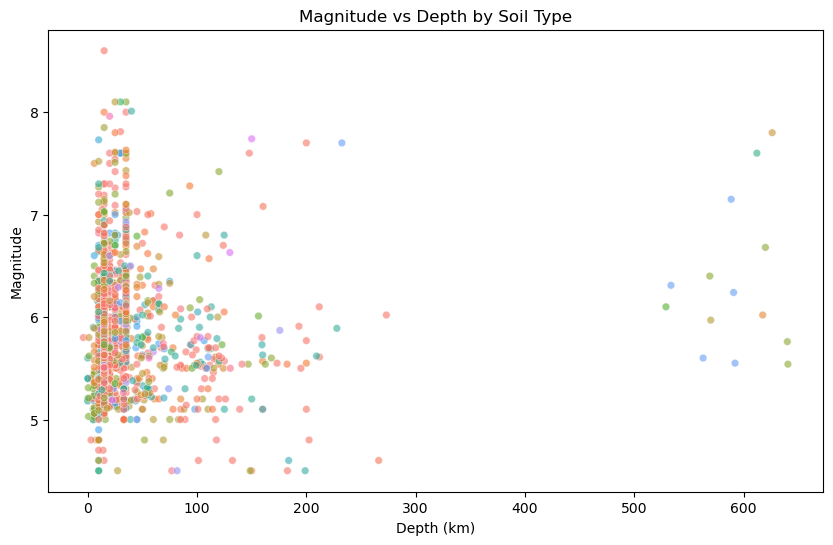

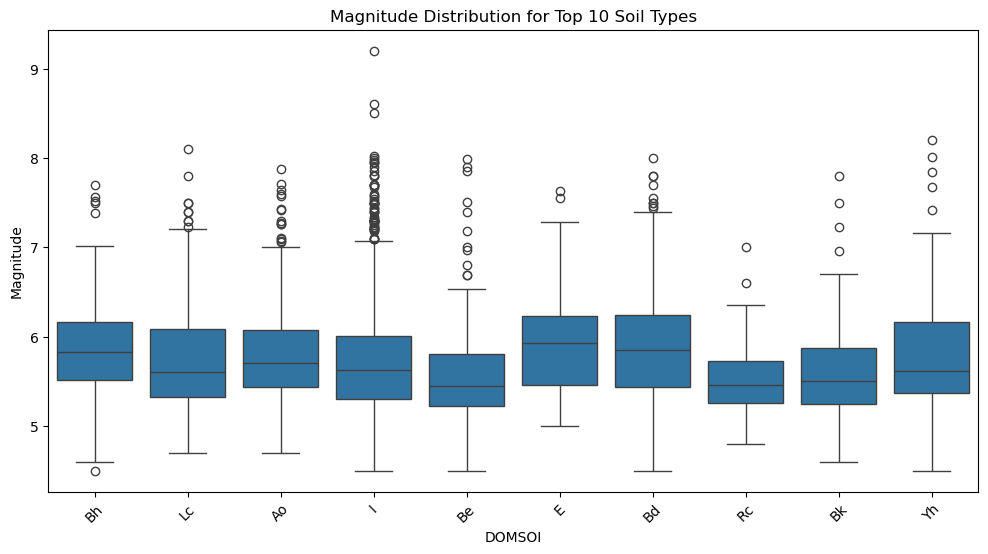

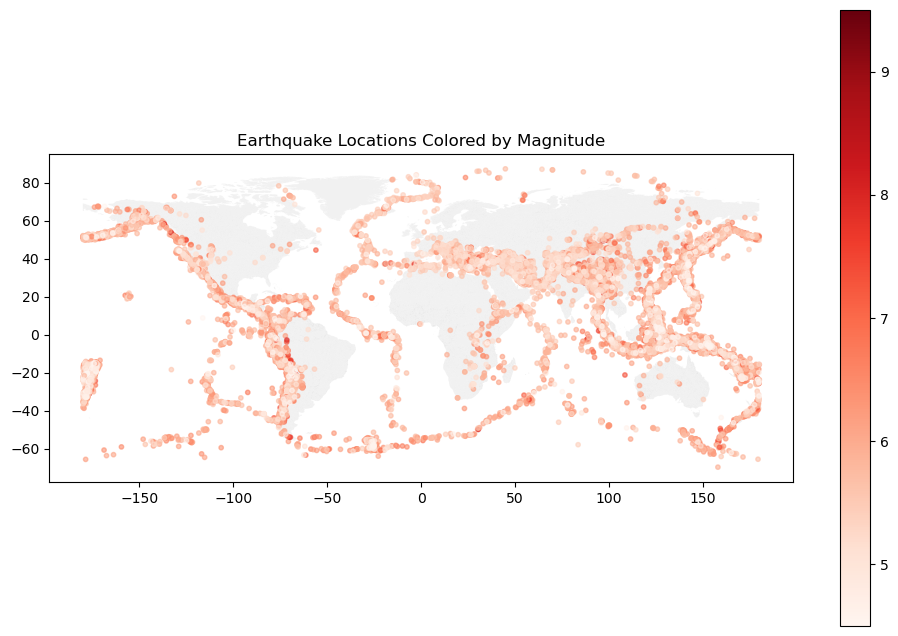

In [9]:
# --- Additional Exploratory Data Analysis ---

# 1. Missing values check
print("\nMissing values per column:")
print(eq_with_soil.isna().sum())

# 2. Correlation heatmap (numerical variables only)
plt.figure(figsize=(8,6))
sns.heatmap(eq_with_soil[['Magnitude','Depth']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Magnitude vs Depth)")
plt.show()

# 3. Magnitude histogram
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Magnitude'], bins=40, kde=True, color="blue")
plt.title("Earthquake Magnitude Distribution")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

# 4. Depth distribution
plt.figure(figsize=(8,5))
sns.histplot(eq_with_soil['Depth'], bins=40, kde=True, color="green")
plt.title("Earthquake Depth Distribution")
plt.xlabel("Depth (km)")
plt.ylabel("Frequency")
plt.show()

# 5. Magnitude vs Depth scatter (colored by soil type)
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=eq_with_soil.sample(5000, random_state=42),  # sample for clarity
    x="Depth", y="Magnitude", hue="DOMSOI", alpha=0.6, s=30, legend=False
)
plt.title("Magnitude vs Depth by Soil Type")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()

# 6. Top N soil types vs Magnitude
top_soils = eq_with_soil['DOMSOI'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(
    data=eq_with_soil[eq_with_soil['DOMSOI'].isin(top_soils)],
    x="DOMSOI", y="Magnitude"
)
plt.title("Magnitude Distribution for Top 10 Soil Types")
plt.xticks(rotation=45)
plt.show()

# 7. Map: magnitude intensity
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
soil_data.plot(ax=ax, color="lightgrey", alpha=0.3)
eq_with_soil.plot(
    ax=ax,
    column="Magnitude",
    cmap="Reds",
    markersize=10,
    alpha=0.6,
    legend=True
)
ax.set_title("Earthquake Locations Colored by Magnitude")
plt.show()

API dataset columns: ['time', 'place', 'magnitude', 'longitude', 'latitude', 'depth']
Historical dataset columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Year']
Common columns available: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source']

Date column types before conversion:
df_api Date type: datetime64[ns]
df_hist Date type: datetime64[ns]
Failed date conversions in df_api: 0
Failed date conversions in df_hist: 0
df_api Date type after conversion: datetime64[ns]
df_hist Date type after conversion: datetime64[ns]

Unified dataset shape: (17882, 7)
Data sources distribution:
Source
Historical    17390
API             492
Name: count, dtype: int64

First few rows:
                     Date  Latitude  Longitude  Depth  Magnitude  \
0 1904-04-04 10:26:00.880    41.758     23.249   15.0       7.02   
1 1904-04-04 10:02:34.560    41.802     23.108   15.0       6.84   
2 1904-06-25 21:00:38.720    52.763    160.277   30.0       7.70   
3

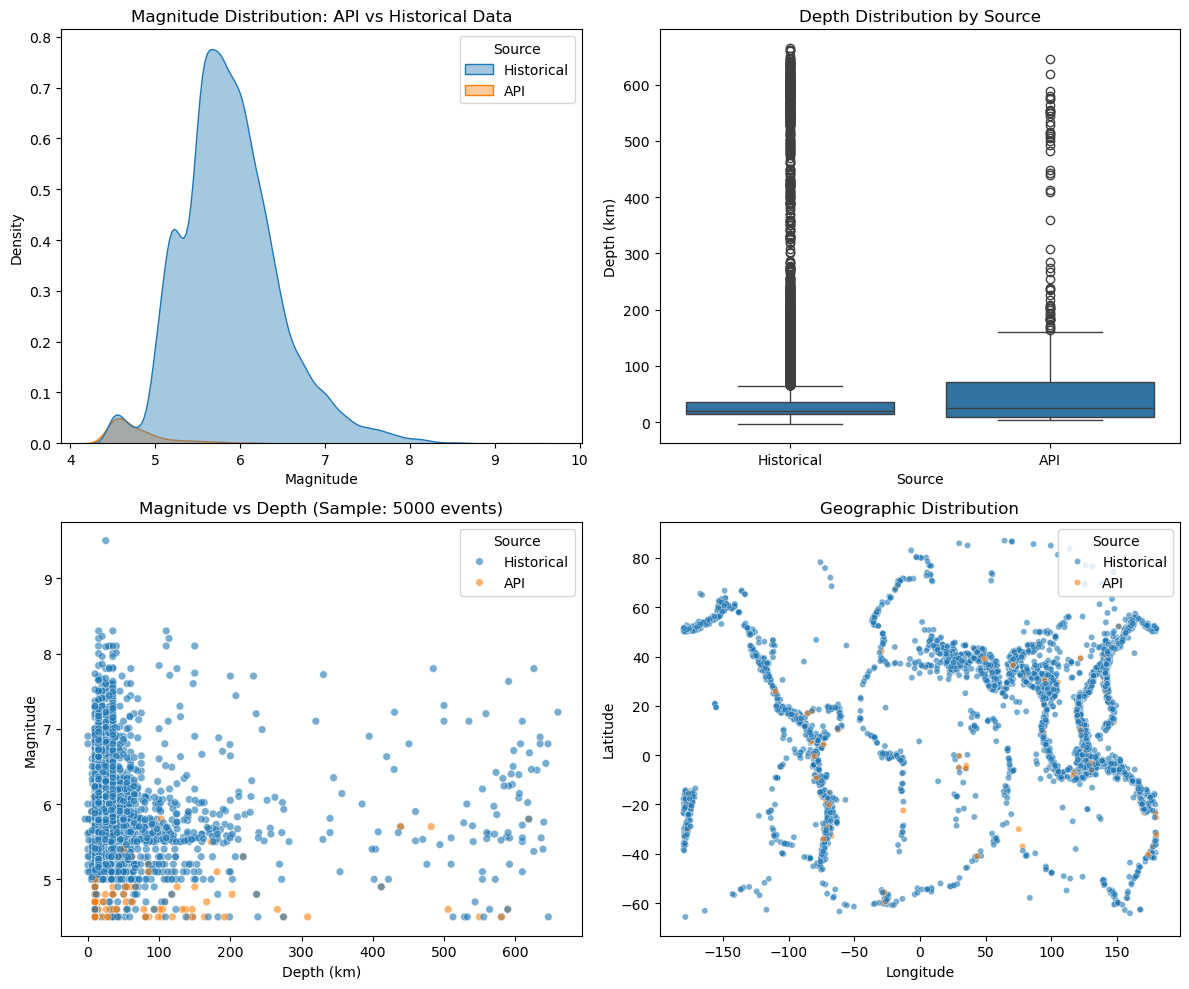

Date column type before Year extraction: datetime64[ns]


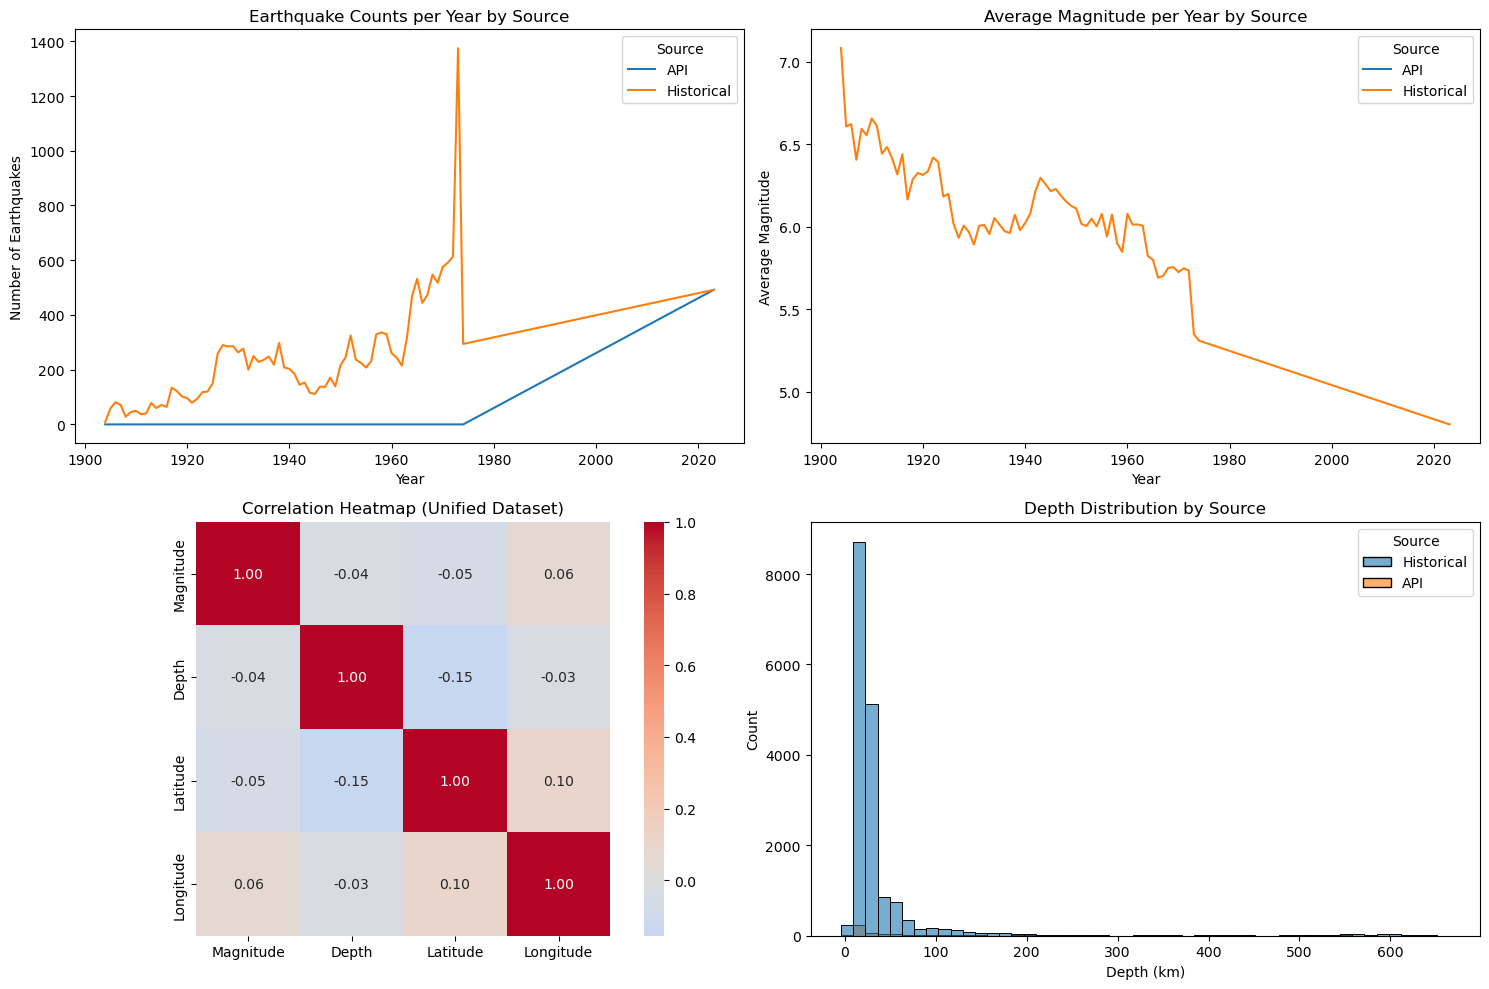

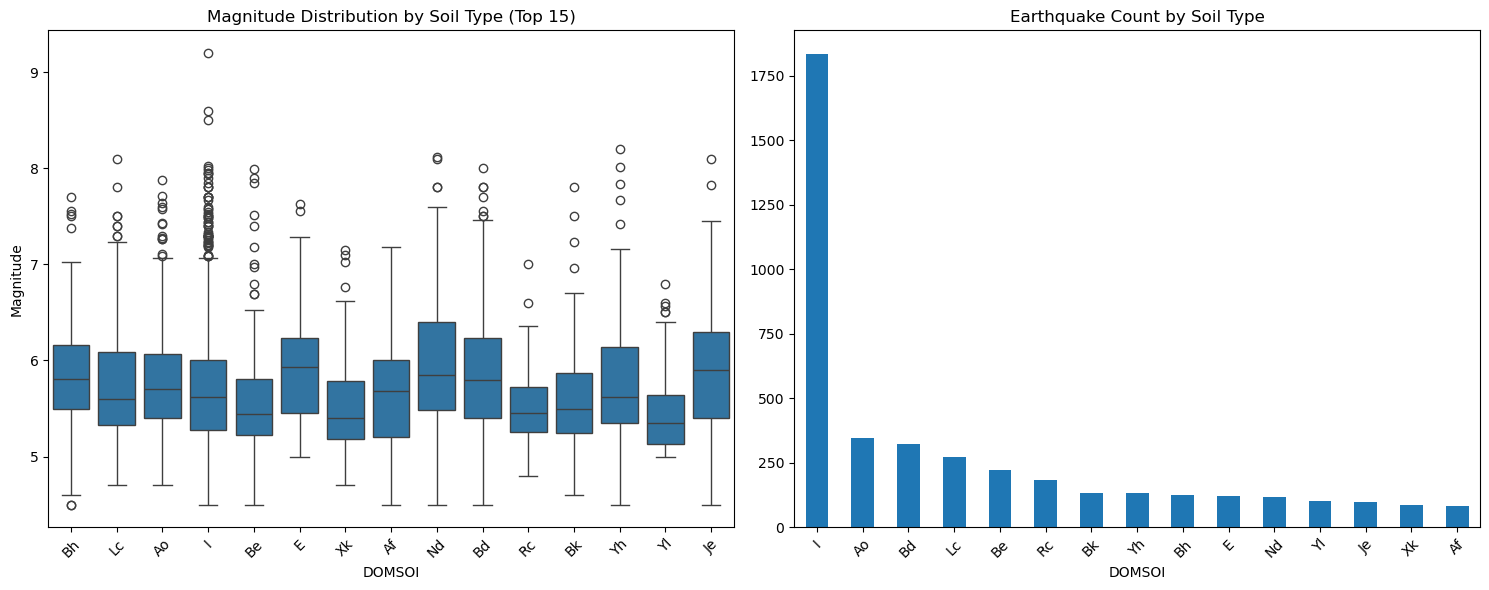


=== SOIL TYPE ANALYSIS ===
       Magnitude                  Depth         
           count   mean    std     mean      std
DOMSOI                                          
Af            82  5.656  0.648   20.583   21.614
Ag             5  5.556  1.042   17.000   10.368
Ah            60  5.949  0.690   31.100   28.448
Ao           345  5.815  0.586   35.040   34.801
Ap            15  6.424  0.749  292.427  292.209
Bc            50  5.696  0.597   23.790   17.260
Bd           324  5.870  0.664   35.125   39.494
Be           220  5.586  0.546   21.549   19.237
Bf            20  5.872  0.526   41.510   24.037
Bg            27  5.857  0.592   34.378   23.433


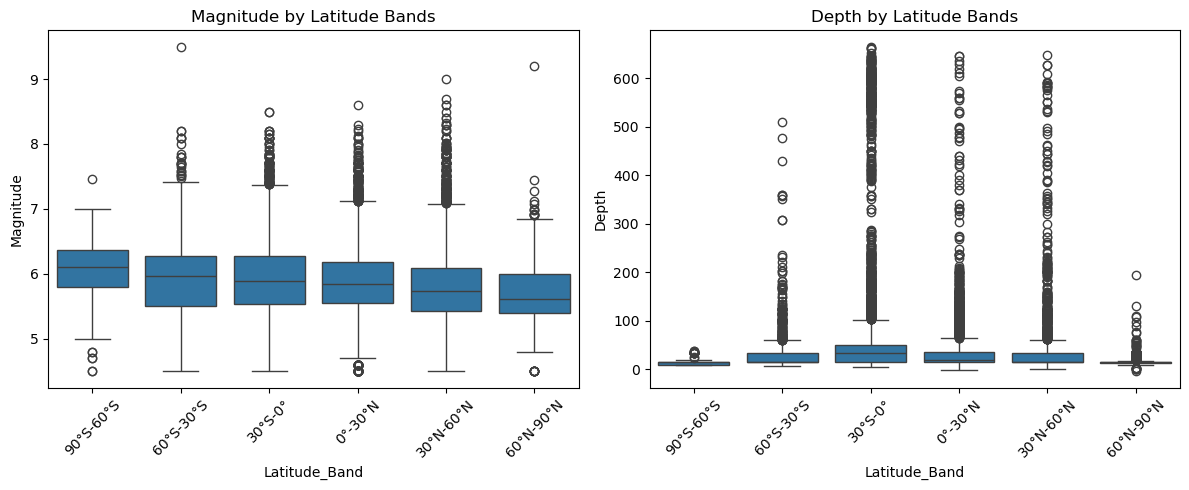


=== UNIFIED DATASET SUMMARY ===
Total earthquakes: 17,882
Time range: 1904-04-04 10:02:34.560000 to 2023-08-31 21:43:25.888000
Geographic range: Lat(-69.7 to 87.2)
                 Lon(-180.0 to 180.0)
Magnitude range: 4.5 to 9.5
Depth range: -4.0 to 665.0 km

=== DATA QUALITY CHECK ===
Missing values per column:
Date                 0
Latitude             0
Longitude            0
Depth                0
Magnitude            0
Location             0
Source               0
merge_id             0
DOMSOI           11957
Year                 0
Latitude_Band        0
dtype: int64

Soil data coverage: 33.1%

Unified dataset saved to: unified_earthquake_data.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Step 1. Align API + Historical datasets ---
print("API dataset columns:", df_api.columns.tolist())
print("Historical dataset columns:", df_hist.columns.tolist())

# Fix the column naming issue
df_api = df_api.rename(columns={
    "time": "Date",
    "latitude": "Latitude",
    "longitude": "Longitude",
    "depth": "Depth",
    "magnitude": "Magnitude",
    "place": "Location"
})

# Add source identifiers
df_api["Source"] = "API"
df_hist["Source"] = "Historical"

# Handle missing 'Location' column if it doesn't exist in df_api
if 'Location' not in df_api.columns:
    df_api['Location'] = "Unknown"

# Keep consistent columns (ensure they exist in both datasets)
available_common_cols = []
for col in ["Date", "Latitude", "Longitude", "Depth", "Magnitude", "Location", "Source"]:
    if col in df_api.columns and col in df_hist.columns:
        available_common_cols.append(col)

print("Common columns available:", available_common_cols)

df_api = df_api[available_common_cols]
df_hist = df_hist[available_common_cols]

# --- Step 2. Fix timezone compatibility issue ---
print("\nDate column types before conversion:")
print(f"df_api Date type: {df_api['Date'].dtype}")
print(f"df_hist Date type: {df_hist['Date'].dtype}")

# Convert both to timezone-naive datetime to avoid conflicts
df_api['Date'] = pd.to_datetime(df_api['Date'], errors='coerce')
df_hist['Date'] = pd.to_datetime(df_hist['Date'], errors='coerce')

# If historical data has timezone info, remove it
if df_hist['Date'].dtype == 'datetime64[ns, UTC]':
    df_hist['Date'] = df_hist['Date'].dt.tz_localize(None)

# Check for any failed conversions
print(f"Failed date conversions in df_api: {df_api['Date'].isna().sum()}")
print(f"Failed date conversions in df_hist: {df_hist['Date'].isna().sum()}")

# Remove rows with invalid dates
df_api = df_api.dropna(subset=['Date'])
df_hist = df_hist.dropna(subset=['Date'])

print(f"df_api Date type after conversion: {df_api['Date'].dtype}")
print(f"df_hist Date type after conversion: {df_hist['Date'].dtype}")

# --- Step 3. Merge both datasets ---
df_all = pd.concat([df_hist, df_api], ignore_index=True)

print("\nUnified dataset shape:", df_all.shape)
print("Data sources distribution:")
print(df_all['Source'].value_counts())
print("\nFirst few rows:")
print(df_all.head())
print(f"Unified Date type: {df_all['Date'].dtype}")

# --- Step 4. Attach Soil/Geological Data ---
# Create a unique identifier for merging
df_all['merge_id'] = df_all['Latitude'].round(3).astype(str) + '_' + df_all['Longitude'].round(3).astype(str)

# Prepare soil data with same identifier
if 'eq_with_soil' in globals():
    eq_with_soil['merge_id'] = eq_with_soil['Latitude'].round(3).astype(str) + '_' + eq_with_soil['Longitude'].round(3).astype(str)

    # Merge soil data
    df_all_geo = pd.merge(
        df_all,
        eq_with_soil[['merge_id', 'DOMSOI']].drop_duplicates(),
        on='merge_id',
        how='left'
    )
else:
    print("Soil data not available, proceeding without it")
    df_all_geo = df_all.copy()
    df_all_geo['DOMSOI'] = np.nan

print("\nUnified dataset with soil shape:", df_all_geo.shape)
print("Soil data coverage:", df_all_geo['DOMSOI'].notna().sum(), "out of", len(df_all_geo))
print("\nSample of unified dataset:")
print(df_all_geo.sample(5))

# --- Step 5. Comprehensive Exploratory Data Analysis Across Sources ---

# 1. Basic statistics by source
print("\n=== BASIC STATISTICS BY SOURCE ===")
print(df_all_geo.groupby('Source').agg({
    'Magnitude': ['count', 'mean', 'std', 'min', 'max'],
    'Depth': ['mean', 'std', 'min', 'max'],
    'Latitude': ['mean', 'std'],
    'Longitude': ['mean', 'std']
}).round(3))

# 2. Distribution plots
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=df_all_geo, x="Magnitude", hue="Source", fill=True, alpha=0.4)
plt.title("Magnitude Distribution: API vs Historical Data")
plt.xlabel("Magnitude")

plt.subplot(2, 2, 2)
sns.boxplot(data=df_all_geo, x="Source", y="Depth")
plt.title("Depth Distribution by Source")
plt.ylabel("Depth (km)")

plt.subplot(2, 2, 3)
sample_size = min(5000, len(df_all_geo))
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Depth", y="Magnitude", hue="Source", alpha=0.6, s=30)
plt.title(f"Magnitude vs Depth (Sample: {sample_size} events)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")

plt.subplot(2, 2, 4)
sns.scatterplot(data=df_all_geo.sample(sample_size, random_state=42),
                x="Longitude", y="Latitude", hue="Source", alpha=0.6, s=20)
plt.title("Geographic Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()
plt.show()

# 6. Time-based analysis (now that dates are properly formatted)
# Double-check date type before extracting year
print(f"Date column type before Year extraction: {df_all_geo['Date'].dtype}")

# If still not datetime, force conversion
if not pd.api.types.is_datetime64_any_dtype(df_all_geo['Date']):
    df_all_geo['Date'] = pd.to_datetime(df_all_geo['Date'], errors='coerce')
    # Remove any rows with invalid dates
    df_all_geo = df_all_geo.dropna(subset=['Date'])

df_all_geo['Year'] = df_all_geo['Date'].dt.year

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
yearly_counts = df_all_geo.groupby(['Year', 'Source']).size().unstack(fill_value=0)
yearly_counts.plot(kind='line', ax=plt.gca())
plt.title("Earthquake Counts per Year by Source")
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")
plt.legend(title="Source")

plt.subplot(2, 2, 2)
yearly_magnitude = df_all_geo.groupby(['Year', 'Source'])['Magnitude'].mean().unstack()
yearly_magnitude.plot(kind='line', ax=plt.gca())
plt.title("Average Magnitude per Year by Source")
plt.xlabel("Year")
plt.ylabel("Average Magnitude")
plt.legend(title="Source")

plt.subplot(2, 2, 3)
correlation_data = df_all_geo[['Magnitude', 'Depth', 'Latitude', 'Longitude']].corr()
sns.heatmap(correlation_data, annot=True, cmap="coolwarm", center=0,
            square=True, fmt=".2f")
plt.title("Correlation Heatmap (Unified Dataset)")

plt.subplot(2, 2, 4)
sns.histplot(data=df_all_geo, x='Depth', hue='Source', bins=50, alpha=0.6)
plt.title("Depth Distribution by Source")
plt.xlabel("Depth (km)")

plt.tight_layout()
plt.show()

# 7. Soil type analysis (if available)
if df_all_geo['DOMSOI'].notna().sum() > 0:
    plt.figure(figsize=(15, 6))

    top_soils = df_all_geo['DOMSOI'].value_counts().head(15).index
    soil_data_subset = df_all_geo[df_all_geo['DOMSOI'].isin(top_soils)]

    plt.subplot(1, 2, 1)
    sns.boxplot(data=soil_data_subset, x="DOMSOI", y="Magnitude")
    plt.title("Magnitude Distribution by Soil Type (Top 15)")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    soil_counts = soil_data_subset['DOMSOI'].value_counts()
    soil_counts.plot(kind='bar')
    plt.title("Earthquake Count by Soil Type")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    print("\n=== SOIL TYPE ANALYSIS ===")
    soil_stats = df_all_geo.groupby('DOMSOI').agg({
        'Magnitude': ['count', 'mean', 'std'],
        'Depth': ['mean', 'std']
    }).round(3)
    print(soil_stats.head(10))

# 8. Advanced spatial analysis
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df_all_geo['Latitude_Band'] = pd.cut(df_all_geo['Latitude'],
                                    bins=np.arange(-90, 91, 30),
                                    labels=['90°S-60°S', '60°S-30°S', '30°S-0°',
                                           '0°-30°N', '30°N-60°N', '60°N-90°N'])
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Magnitude')
plt.title("Magnitude by Latitude Bands")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_all_geo, x='Latitude_Band', y='Depth')
plt.title("Depth by Latitude Bands")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 9. Summary statistics for the unified dataset
print("\n=== UNIFIED DATASET SUMMARY ===")
print(f"Total earthquakes: {len(df_all_geo):,}")
print(f"Time range: {df_all_geo['Date'].min()} to {df_all_geo['Date'].max()}")
print(f"Geographic range: Lat({df_all_geo['Latitude'].min():.1f} to {df_all_geo['Latitude'].max():.1f})")
print(f"                 Lon({df_all_geo['Longitude'].min():.1f} to {df_all_geo['Longitude'].max():.1f})")
print(f"Magnitude range: {df_all_geo['Magnitude'].min():.1f} to {df_all_geo['Magnitude'].max():.1f}")
print(f"Depth range: {df_all_geo['Depth'].min():.1f} to {df_all_geo['Depth'].max():.1f} km")

# 10. Data quality check
print("\n=== DATA QUALITY CHECK ===")
print("Missing values per column:")
print(df_all_geo.isnull().sum())
print(f"\nSoil data coverage: {df_all_geo['DOMSOI'].notna().mean():.1%}")

# Save the unified dataset for future use
df_all_geo.to_csv('D:/Earthquake_impact_prediction/unified_earthquake_data.csv', index=False)
print("\nUnified dataset saved to: unified_earthquake_data.csv")

In [11]:
#Preprocessing and feature engineering
import pandas as pd

df = pd.read_csv("D:/Earthquake_impact_prediction/unified_earthquake_data.csv")

print("Missing values per column before cleaning:")
print(df.isnull().sum())

# --- Strategy ---
# Numeric: fill with median
num_cols = ['Magnitude', 'Depth']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Categorical: fill with mode
cat_cols = ['Location', 'DOMSOI']
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save intermediate version
df.to_csv("D:/Earthquake_impact_prediction/earthquake_cleaned_day1.csv", index=False)

Missing values per column before cleaning:
Date                 0
Latitude             0
Longitude            0
Depth                0
Magnitude            0
Location             0
Source               0
merge_id             0
DOMSOI           11957
Year                 0
Latitude_Band        0
dtype: int64

Missing values after imputation:
Date             0
Latitude         0
Longitude        0
Depth            0
Magnitude        0
Location         0
Source           0
merge_id         0
DOMSOI           0
Year             0
Latitude_Band    0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("D:/Earthquake_impact_prediction/earthquake_cleaned_day1.csv")

# Select numeric features
numeric_features = ['Magnitude', 'Depth']

scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

print(df_scaled[numeric_features].describe())

# Save scaled dataset
df_scaled.to_csv("D:/Earthquake_impact_prediction/earthquake_scaled_day2.csv", index=False)

          Magnitude         Depth
count  1.788200e+04  1.788200e+04
mean   6.103309e-16  1.271523e-17
std    1.000028e+00  1.000028e+00
min   -2.268279e+00 -5.832980e-01
25%   -5.909829e-01 -3.396975e-01
50%   -7.102105e-02 -2.755921e-01
75%    5.663515e-01 -8.327596e-02
max    6.118202e+00  7.994003e+00


In [13]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("D:/Earthquake_impact_prediction/earthquake_scaled_day2.csv")

# Encode Soil Type (DOMSOI)
if 'DOMSOI' in df.columns:
    encoder = LabelEncoder()
    df['SoilType_Encoded'] = encoder.fit_transform(df['DOMSOI'])
else:
    df['SoilType_Encoded'] = -1  # fallback if missing

# Encode Location (optional, may be too high-cardinality)
df['Location_Encoded'] = LabelEncoder().fit_transform(df['Location'])

print(df[['DOMSOI', 'SoilType_Encoded']].head())

# Save encoded dataset
df.to_csv("D:/Earthquake_impact_prediction/earthquake_encoded_day3.csv", index=False)

  DOMSOI  SoilType_Encoded
0     Bh                10
1     Lc                46
2      I                36
3      I                36
4     GL                26


In [14]:
import numpy as np
from sklearn.cluster import KMeans

df = pd.read_csv("D:/Earthquake_impact_prediction/earthquake_encoded_day3.csv")

# 1. Magnitude Category
df['Magnitude_Class'] = pd.cut(
    df['Magnitude'],
    bins=[0, 4, 6, 7, 10],
    labels=['Low', 'Moderate', 'Strong', 'Major']
)

# 2. Depth Category
df['Depth_Class'] = pd.cut(
    df['Depth'],
    bins=[-1, 70, 300, 700],
    labels=['Shallow', 'Intermediate', 'Deep']
)

# 3. Risk Score (simple weighted sum)
df['Risk_Score'] = (
    (df['Magnitude'] * 0.7) +
    (np.log1p(df['Depth']) * 0.3)
)

# 4. Spatial Clusters
coords = df[['Latitude', 'Longitude']]
kmeans = KMeans(n_clusters=5, random_state=42)
df['Region_Cluster'] = kmeans.fit_predict(coords)

print(df[['Magnitude', 'Depth', 'Risk_Score', 'Region_Cluster']].head())

# Save engineered dataset
df.to_csv("D:/Earthquake_impact_prediction/earthquake_features_day4.csv", index=False)

   Magnitude     Depth  Risk_Score  Region_Cluster
0   1.958507 -0.339698    1.246438               3
1   1.656594 -0.339698    1.035099               3
2   3.099069 -0.147381    2.121515               4
3   2.763610 -0.339698    1.810010               4
4   2.075918 -0.339698    1.328626               4


In [15]:
# Load latest version
df_final = pd.read_csv("D:/Earthquake_impact_prediction/earthquake_features_day4.csv")

print("Final dataset shape:", df_final.shape)
print("Final columns:", df_final.columns.tolist())

# Save final dataset for modeling
df_final.to_csv("D:/Earthquake_impact_prediction/earthquake_preprocessed_week2.csv", index=False)

Final dataset shape: (17882, 17)
Final columns: ['Date', 'Latitude', 'Longitude', 'Depth', 'Magnitude', 'Location', 'Source', 'merge_id', 'DOMSOI', 'Year', 'Latitude_Band', 'SoilType_Encoded', 'Location_Encoded', 'Magnitude_Class', 'Depth_Class', 'Risk_Score', 'Region_Cluster']


In [16]:
#Baseline Model Training

import pandas as pd

df = pd.read_csv("D:/Earthquake_impact_prediction/earthquake_preprocessed_week2.csv")

# Example: Add target labels (Magnitude_Class from Week 2)
print("Sample Magnitude Classes:")
print(df[['Magnitude', 'Magnitude_Class']].head())

# Regression target = Magnitude (numeric)
# Classification target = Magnitude_Class (categorical)

Sample Magnitude Classes:
   Magnitude Magnitude_Class
0   1.958507             Low
1   1.656594             Low
2   3.099069             Low
3   2.763610             Low
4   2.075918             Low


In [17]:
#Logistic Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features & target
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Check & drop rows with missing target (y)
df = df.dropna(subset=['Magnitude_Class'])
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Define preprocessing: numeric → median, categorical → most frequent
numeric_cols = ['Magnitude', 'Depth']
categorical_cols = ['SoilType_Encoded', 'Region_Cluster']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols)
    ])

# Build pipeline (imputation + logistic regression)
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='multinomial'))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit + predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred))



=== Logistic Regression Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1676
    Moderate       1.00      0.20      0.33         5

    accuracy                           1.00      1681
   macro avg       1.00      0.60      0.67      1681
weighted avg       1.00      1.00      1.00      1681



c:\Users\bange\Downloads\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Decision Tree Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1676
    Moderate       1.00      1.00      1.00         5

    accuracy                           1.00      1681
   macro avg       1.00      1.00      1.00      1681
weighted avg       1.00      1.00      1.00      1681



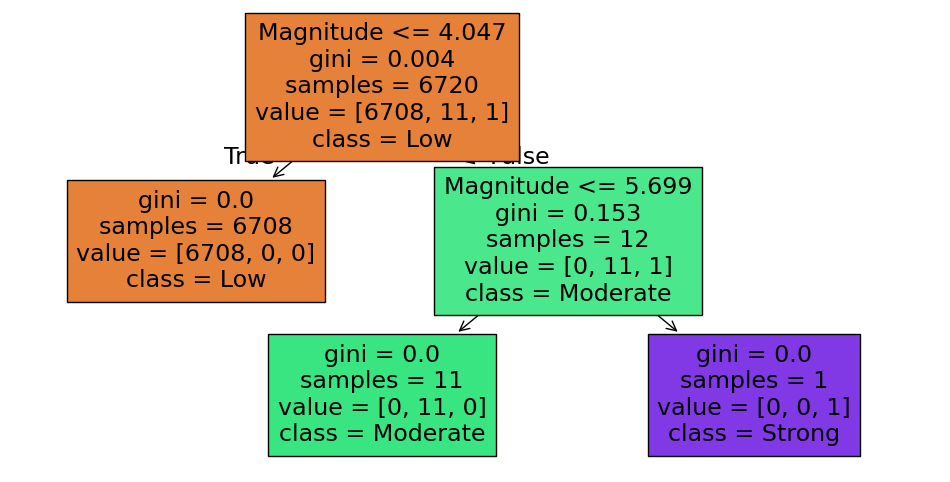

In [18]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("\n=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_tree))

# Visualize tree
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()

Logistic Regression Accuracy: 0.998
Decision Tree Accuracy: 1.000


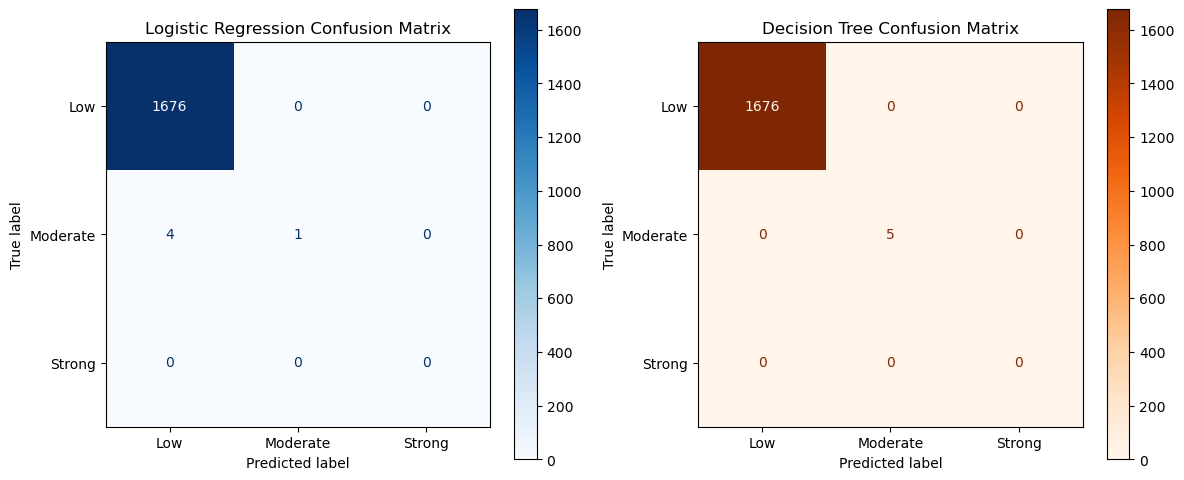

In [19]:
#Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Logistic Regression
acc_log = accuracy_score(y_test, y_pred)
cm_log = confusion_matrix(y_test, y_pred, labels=clf.named_steps['model'].classes_)

# Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Decision Tree Accuracy: {acc_tree:.3f}")

# Confusion Matrix Plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay(cm_log, display_labels=clf.named_steps['model'].classes_).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay(cm_tree, display_labels=tree.classes_).plot(ax=axes[1], cmap="Oranges")
axes[1].set_title("Decision Tree Confusion Matrix")

plt.tight_layout()
plt.show()

In [20]:
#Baseline model comparison
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [acc_log, acc_tree]
})

print("\n=== Baseline Model Comparison ===")
print(results)

# Save baseline model results
results.to_csv("D:/Earthquake_impact_prediction/baseline_results_week3.csv", index=False)


=== Baseline Model Comparison ===
                 Model  Accuracy
0  Logistic Regression   0.99762
1        Decision Tree   1.00000


Class counts:
 Magnitude_Class
Low         8384
Moderate      16
Strong         1
Name: count, dtype: int64

 Random Forest Accuracy: 1.000

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1677
    Moderate       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



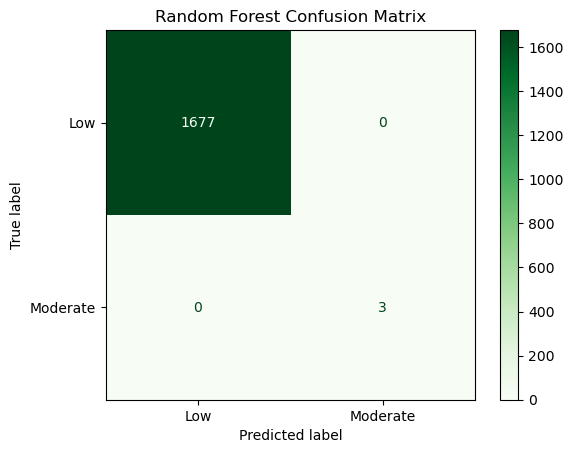


 Random Forest model saved as: random_forest_day1.pkl


In [21]:
#Advanced Models & Hyperparameter Tuning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the preprocessed dataset
df = pd.read_csv("D:/Earthquake_impact_prediction/earthquake_features_day4.csv")

# Drop missing target rows if any
df = df.dropna(subset=['Magnitude_Class'])

# Features & Target
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Train-Test Split (same as Week 3)
counts=y.value_counts()
print("Class counts:\n", counts)
rare_classes = counts[counts < 2].index
df=df[~df['Magnitude_Class'].isin(rare_classes)]
X=df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y=df['Magnitude_Class']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=None
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\n Random Forest Accuracy: {acc_rf:.3f}")
print("\n=== Classification Report (Random Forest) ===")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# Save Day 1 model performance
import joblib
joblib.dump(rf, "D:/Earthquake_impact_prediction/random_forest_day1.pkl")

print("\n Random Forest model saved as: random_forest_day1.pkl")

Class counts:
 Magnitude_Class
Low         8384
Moderate      16
Strong         1
Name: count, dtype: int64
Class Weights: {'Low': 0.500969136722827, 'Moderate': 258.46153846153845}

Updated Random Forest Accuracy: 1.000

Updated Classification Report (Random Forest) 
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1677
    Moderate       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



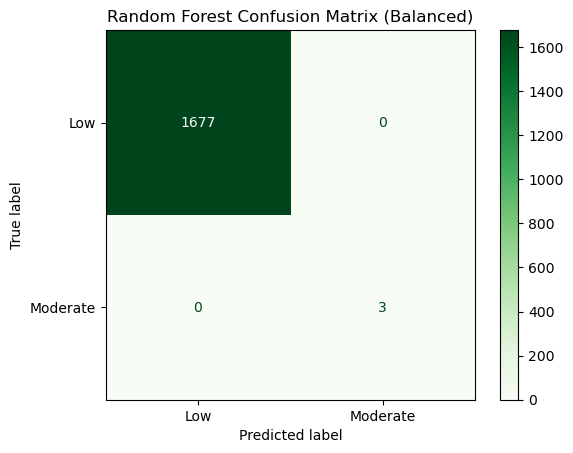


Balanced Random Forest saved as: random_forest_day1_balanced.pkl


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Load data
df = pd.read_csv("D:/Earthquake_impact_prediction/earthquake_features_day4.csv")
df = df.dropna(subset=['Magnitude_Class'])

X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Train-Test Split
counts=y.value_counts()
print("Class counts:\n", counts)
rare_classes = counts[counts < 2].index
df=df[~df['Magnitude_Class'].isin(rare_classes)]
X=df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y=df['Magnitude_Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=y_train
)
class_weight_dict = {cls: w for cls, w in zip(classes, class_weights)}
print("Class Weights:", class_weight_dict)

# Train Random Forest with balanced classes
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    max_depth=None,
    class_weight=class_weight_dict
)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nUpdated Random Forest Accuracy: {acc_rf:.3f}")
print("\nUpdated Classification Report (Random Forest) ")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm_rf, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix (Balanced)")
plt.show()

# Save updated model
import joblib
joblib.dump(rf, "D:/Earthquake_impact_prediction/random_forest_day1_balanced.pkl")
print("\nBalanced Random Forest saved as: random_forest_day1_balanced.pkl")

✅ Class counts after filtering:
 Magnitude_Class_Encoded
0    8384
1      16
Name: count, dtype: int64

✅ Class Weights for XGBoost:
 {0: 0.500969136722827, 1: 258.46153846153845}

✅ XGBoost Accuracy: 1.000

📊 Classification Report (XGBoost):
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1677
    Moderate       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



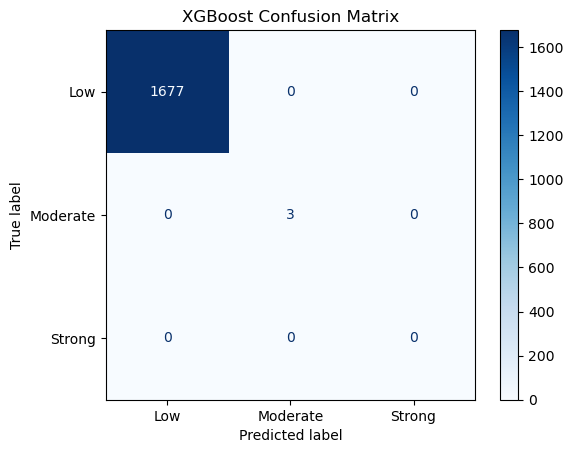

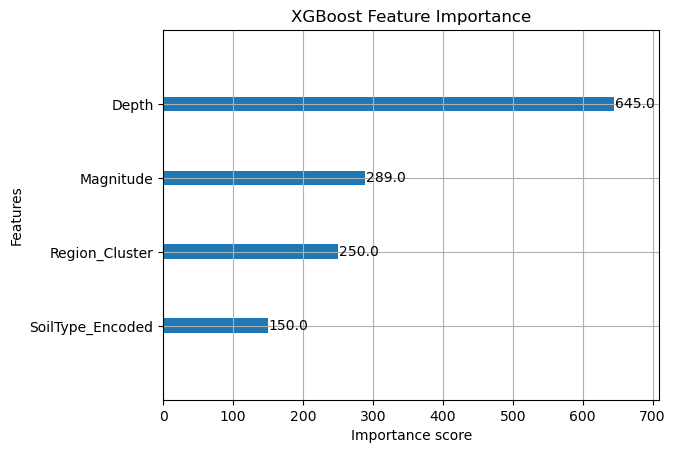


💾 Model and Encoder saved successfully:
   - XGBoost model: xgboost_day2.pkl
   - Label encoder: label_encoder.pkl


In [24]:
# XGBoost Classifier (Final Version)
import pandas as pd
import numpy as np
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import matplotlib.pyplot as plt
import joblib

# -----------------------------
# Load and preprocess data
# -----------------------------
df = pd.read_csv("D:/Earthquake_impact_prediction/earthquake_features_day4.csv")
df = df.dropna(subset=["Magnitude_Class"])  # Drop rows without target

# Encode target labels
le = LabelEncoder()
df["Magnitude_Class_Encoded"] = le.fit_transform(df["Magnitude_Class"])

# Remove rare classes (with <2 samples)
class_counts = df["Magnitude_Class_Encoded"].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df = df[df["Magnitude_Class_Encoded"].isin(valid_classes)]

# Features and target
X = df[["Magnitude", "Depth", "SoilType_Encoded", "Region_Cluster"]]
y = df["Magnitude_Class_Encoded"]

print("✅ Class counts after filtering:\n", y.value_counts())

# -----------------------------
# Train-Test Split (safe for stratify)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# Handle Class Imbalance (compute class weights)
# -----------------------------
class_counts = pd.Series(y_train).value_counts()
total = len(y_train)
class_weights = {
    cls: total / (len(class_counts) * count) for cls, count in class_counts.items()
}
sample_weights = pd.Series(y_train).map(class_weights)

print("\n✅ Class Weights for XGBoost:\n", class_weights)

# -----------------------------
# Train XGBoost Model
# -----------------------------
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective="multi:softmax",
    num_class=len(np.unique(y_train)),
)

xgb.fit(X_train, y_train, sample_weight=sample_weights)

# -----------------------------
# Predictions
# -----------------------------
y_pred_xgb = xgb.predict(X_test)

# Decode to original labels for better readability
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred_xgb)

# -----------------------------
# Evaluation Metrics
# -----------------------------
acc_xgb = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"\n✅ XGBoost Accuracy: {acc_xgb:.3f}")

print("\n📊 Classification Report (XGBoost):")
print(classification_report(y_test_decoded, y_pred_decoded))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_decoded, y_pred_decoded, labels=le.classes_)
disp = ConfusionMatrixDisplay(cm_xgb, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

# -----------------------------
# Feature Importance
# -----------------------------
plot_importance(xgb)
plt.title("XGBoost Feature Importance")
plt.show()

# -----------------------------
# Save Model + Encoder
# -----------------------------
joblib.dump(xgb, "D:/Earthquake_impact_prediction/xgboost_day2.pkl")
joblib.dump(le, "D:/Earthquake_impact_prediction/label_encoder.pkl")

print("\n💾 Model and Encoder saved successfully:")
print("   - XGBoost model: xgboost_day2.pkl")
print("   - Label encoder: label_encoder.pkl")


In [29]:
# Day 3 – Cross-Validation for Random Forest & XGBoost

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n Running Cross-Validation for Random Forest...")

# Random Forest WITHOUT class_weight during CV to avoid failure
rf_cv_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)

rf_cv_scores = cross_val_score(rf_cv_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Fold Accuracies:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

print("\nRunning Cross-Validation for XGBoost...")

xgb_cv_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_cv_scores = cross_val_score(xgb_cv_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Fold Accuracies:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())


 Running Cross-Validation for Random Forest...
Fold Accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0

Running Cross-Validation for XGBoost...
Fold Accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [30]:
import pickle
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming you already have:
# X_train, X_test, y_train, y_test
# Label-encoded y values: 0, 1, 2, 3

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. RANDOM FOREST TUNING
rf_model = RandomForestClassifier(random_state=42)

rf_param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Tuning Random Forest...")
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("\nBest Random Forest Params:", rf_search.best_params_)

# Evaluate
rf_preds = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("\nRandom Forest Accuracy (Tuned):", round(rf_acc, 3))
print("\nClassification Report (Random Forest) ")
print(classification_report(y_test, rf_preds))

# Save model
with open("random_forest_tuned.pkl", "wb") as f:
    pickle.dump(best_rf, f)
print("Tuned Random Forest saved as: random_forest_tuned.pkl")


# 2. XGBOOST TUNING
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

xgb_param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nTuning XGBoost...")
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
print("\nBest XGBoost Params:", xgb_search.best_params_)

# Evaluate
xgb_preds = best_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)
print("\nXGBoost Accuracy (Tuned):", round(xgb_acc, 3))
print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test, xgb_preds))

# Save model
with open("xgboost_tuned.pkl", "wb") as f:
    pickle.dump(best_xgb, f)
print("Tuned XGBoost saved as: xgboost_tuned.pkl")

Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}

Random Forest Accuracy (Tuned): 1.0

Classification Report (Random Forest) 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1677
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

Tuned Random Forest saved as: random_forest_tuned.pkl

Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\bange\Downloads\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:16:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 1.0}

XGBoost Accuracy (Tuned): 1.0

=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1677
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

Tuned XGBoost saved as: xgboost_tuned.pkl


In [31]:
#Cross validation for Random Forest and XGBoost

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

#Stratified K-fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n Running Cross-Validation for Random Forest")

#Random forest without class_weight during CV to avoid failure
rf_cv_scores=cross_val_score(rf_cv_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Fold accuracies:",rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

print("\n Running Cross-Validation for XGBoost")

xgb_cv_model=xgb.XGBClassifier(
    objective="multi:softmax", 
    num_class=4, 
    eval_metric="mlogloss", 
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_cv_scores=cross_val_score(xgb_cv_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Fold Accuracies:",xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())





 Running Cross-Validation for Random Forest
Fold accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0

 Running Cross-Validation for XGBoost
Fold Accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [32]:
import pickle
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming you already have:
# X_train, X_test, y_train, y_test
# Label-encoded y values: 0, 1, 2, 3

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. RANDOM FOREST TUNING
rf_model = RandomForestClassifier(random_state=42)

rf_param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Tuning Random Forest...")
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("\nBest Random Forest Params:", rf_search.best_params_)

# Evaluate
rf_preds = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("\nRandom Forest Accuracy (Tuned):", round(rf_acc, 3))
print("\nClassification Report (Random Forest) ")
print(classification_report(y_test, rf_preds))

# Save model
with open("random_forest_tuned.pkl", "wb") as f:
    pickle.dump(best_rf, f)
print("Tuned Random Forest saved as: random_forest_tuned.pkl")


# 2. XGBOOST TUNING
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

xgb_param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nTuning XGBoost...")
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
print("\nBest XGBoost Params:", xgb_search.best_params_)

# Evaluate
xgb_preds = best_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)
print("\nXGBoost Accuracy (Tuned):", round(xgb_acc, 3))
print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test, xgb_preds))

# Save model
with open("xgboost_tuned.pkl", "wb") as f:
    pickle.dump(best_xgb, f)
print("Tuned XGBoost saved as: xgboost_tuned.pkl")


Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}

Random Forest Accuracy (Tuned): 1.0

Classification Report (Random Forest) 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1677
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

Tuned Random Forest saved as: random_forest_tuned.pkl

Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


c:\Users\bange\Downloads\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:19:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 1.0}

XGBoost Accuracy (Tuned): 1.0

=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1677
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680

Tuned XGBoost saved as: xgboost_tuned.pkl


In [33]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

# Use the same label-encoded y_train
print("Unique Encoded Classes:", np.unique(y_train))

# Step 1: Define correct class weights (based on encoded labels)
class_weights = {
    0: 0.25402724169829977,   # Low
    1: 995.4375,              # Major
    2: 16.385802469135804,    # Moderate
    3: 723.9545454545455      # Strong
}

# Step 2: Map weights to each training sample
sample_weights = np.array([class_weights[label] for label in y_train])

# Step 3: Initialize base model for GridSearch (no silent params)
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    random_state=42,
    tree_method='hist',
    eval_metric='mlogloss'
)

#Step 4: Define improved grid with fewer params to test
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.01, 0.05],
    'subsample': [1.0],
    'colsample_bytree': [1.0],
    'gamma': [0, 1]
}

#Step 5: Run GridSearchCV with sample weights applied
print("\nTuning XGBoost with Class Weights...")
grid_search_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1
)

grid_search_xgb.fit(X_train, y_train, sample_weight=sample_weights)

best_xgb = grid_search_xgb.best_estimator_
print("\nBest XGBoost Params:", grid_search_xgb.best_params_)

# Step 6: Evaluate tuned model
y_pred_xgb = best_xgb.predict(X_test)
print("\nXGBoost Accuracy (Tuned):", accuracy_score(y_test, y_pred_xgb))

print("\Classification Report (XGBoost)")
print(classification_report(y_test, y_pred_xgb))

# Step 7: Save model
joblib.dump(best_xgb, 'xgboost_tuned_weighted.pkl')
print("\nTuned XGBoost saved as: xgboost_tuned_weighted.pkl")


<>:59: SyntaxWarning: invalid escape sequence '\C'
<>:59: SyntaxWarning: invalid escape sequence '\C'
C:\Users\bange\AppData\Local\Temp\ipykernel_10792\2452499922.py:59: SyntaxWarning: invalid escape sequence '\C'
  print("\Classification Report (XGBoost)")


Unique Encoded Classes: [0 1]

Tuning XGBoost with Class Weights...

Best XGBoost Params: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}

XGBoost Accuracy (Tuned): 1.0
\Classification Report (XGBoost)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1677
           1       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680


Tuned XGBoost saved as: xgboost_tuned_weighted.pkl


In [36]:
import pandas as pd
import pickle
import joblib
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Load Tuned Models & Encoder
rf_model = pickle.load(open("D:/Earthquake_impact_prediction/random_forest_tuned.pkl", "rb"))
xgb_model = joblib.load("D:/Earthquake_impact_prediction/xgboost_tuned_weighted.pkl")
label_encoder = joblib.load("D:/Earthquake_impact_prediction/label_encoder.pkl")

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy Scores
rf_accuracy = accuracy_score(y_test, y_pred_rf)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print("\nModel Accuracies:")
print(f"Random Forest: {rf_accuracy:.4f}")
print(f"XGBoost: {xgb_accuracy:.4f}")

# Get actual classes present in y_test
unique_labels = np.unique(y_test)

# Decode the numeric labels to original class names for reporting
target_names = label_encoder.inverse_transform(unique_labels)

# Classification Reports
print("\n=== Classification Report (Random Forest) ===")
print(classification_report(
    y_test, y_pred_rf,
    labels=unique_labels,
    target_names=target_names
))

print("\n=== Classification Report (XGBoost) ===")
print(classification_report(
    y_test, y_pred_xgb,
    labels=unique_labels,
    target_names=target_names
))

# Summary Table
summary = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "XGBoost (Weighted + Tuned)"],
    "Accuracy": [rf_accuracy, xgb_accuracy],
})
print("\nModel Comparison Summary:")
print(summary)

# Save Summary to CSV
summary.to_csv("model_comparison_summary.csv", index=False)
print("\nSummary saved as: model_comparison_summary.csv")

# Save both models again (optional backup)
pickle.dump(rf_model, open("best_random_forest.pkl", "wb"))
pickle.dump(xgb_model, open("best_xgboost.pkl", "wb"))
print("Both models backed up as best_random_forest.pkl and best_xgboost.pkl")



Model Accuracies:
Random Forest: 1.0000
XGBoost: 1.0000

=== Classification Report (Random Forest) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1677
    Moderate       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680


=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1677
    Moderate       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680


Model Comparison Summary:
                        Model  Accuracy
0       Random Forest (Tuned)       1.0
1  XGBoost (Weighted + Tuned)       1.0

Summary saved as: model_comparison_summary.csv
Both m

In [37]:
# Evaluation & Explainability
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pickle
import joblib

# Load models
rf_model = pickle.load(open("best_random_forest.pkl", "rb"))
xgb_model = pickle.load(open("best_xgboost.pkl", "rb"))

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

print("\n Evaluation Metrics (Day 1)")

def print_metrics(name, y_true, y_pred):
    print(f"\n {name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision (macro): {precision_score(y_true, y_pred, average='macro'):.4f}")
    print(f"Recall (macro): {recall_score(y_true, y_pred, average='macro'):.4f}")
    print(f"F1-score (macro): {f1_score(y_true, y_pred, average='macro'):.4f}")

print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("XGBoost", y_test, y_pred_xgb)



 Evaluation Metrics (Day 1)

 Random Forest
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000

 XGBoost
Accuracy: 1.0000
Precision (macro): 1.0000
Recall (macro): 1.0000
F1-score (macro): 1.0000



Classification Reports (Day 2)

Random Forest
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1677
    Moderate       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



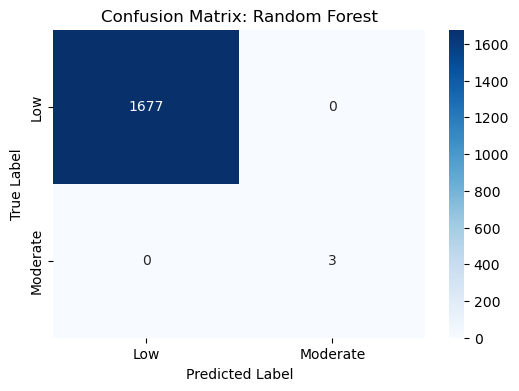


XGBoost
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      1677
    Moderate       1.00      1.00      1.00         3

    accuracy                           1.00      1680
   macro avg       1.00      1.00      1.00      1680
weighted avg       1.00      1.00      1.00      1680



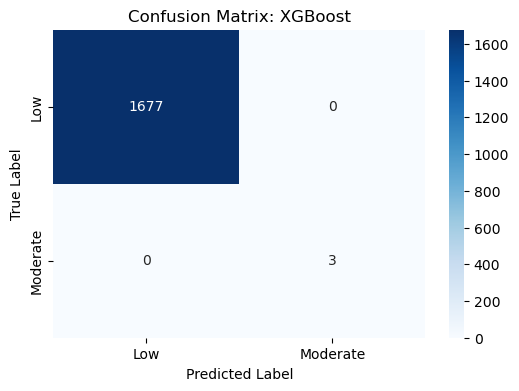

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import numpy as np

# Load label encoder
label_encoder = joblib.load("D:/Earthquake_impact_prediction/label_encoder.pkl")

# Get unique labels in y_test and convert to names
unique_labels = np.unique(y_test)
present_class_names = label_encoder.inverse_transform(unique_labels)

# Function to plot confusion matrix
def plot_conf_matrix(y_true, y_pred, labels, class_names, title):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Confusion Matrix: {title}")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

# Classification Reports and Confusion Matrices
print("\nClassification Reports (Day 2)")

# Random Forest
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf, labels=unique_labels, target_names=present_class_names))
plot_conf_matrix(y_test, y_pred_rf, labels=unique_labels, class_names=present_class_names, title="Random Forest")

# XGBoost
print("\nXGBoost")
print(classification_report(y_test, y_pred_xgb, labels=unique_labels, target_names=present_class_names))
plot_conf_matrix(y_test, y_pred_xgb, labels=unique_labels, class_names=present_class_names, title="XGBoost")


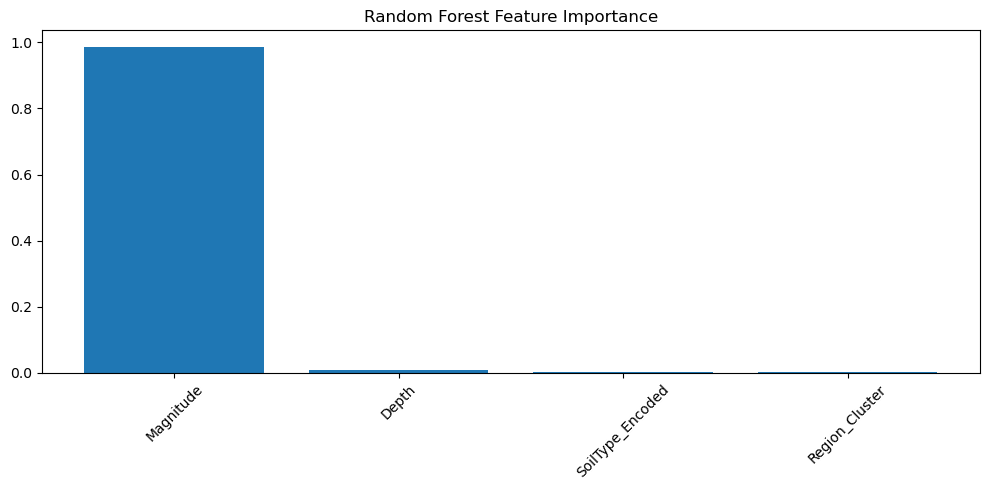

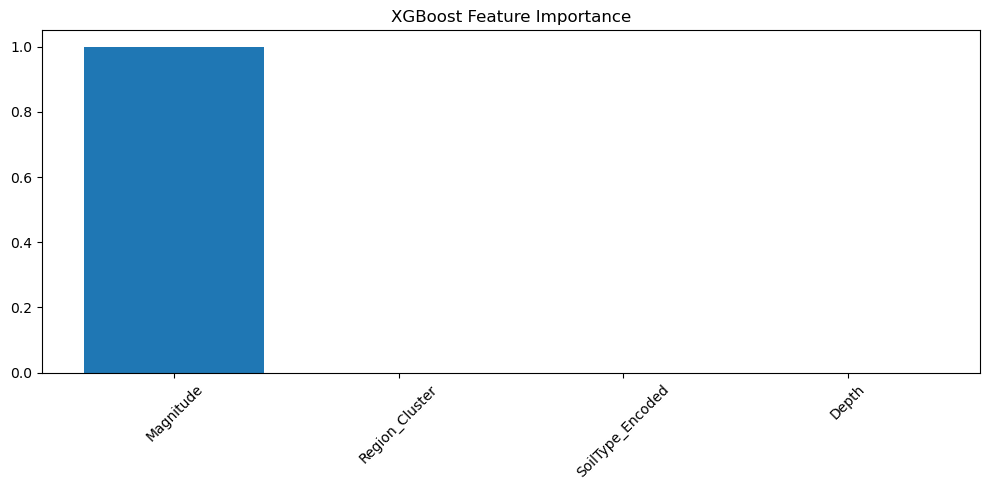

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_test is a pandas DataFrame
feature_names = X_test.columns

# Random Forest Feature Importances
rf_importances = rf_model.feature_importances_
rf_sorted_idx = np.argsort(rf_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), rf_importances[rf_sorted_idx])
plt.xticks(range(len(feature_names)), feature_names[rf_sorted_idx], rotation=45)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

# XGBoost Feature Importances
xgb_importances = xgb_model.feature_importances_
xgb_sorted_idx = np.argsort(xgb_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(len(feature_names)), xgb_importances[xgb_sorted_idx])
plt.xticks(range(len(feature_names)), feature_names[xgb_sorted_idx], rotation=45)
plt.title("XGBoost Feature Importance")
plt.tight_layout()
plt.show()

In [43]:
pip install shap

   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/548.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/548.0 kB ? eta -:--:--
   ---------------------------------------- 548.0/548.0 kB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



SHAP Summary Plot for Random Forest


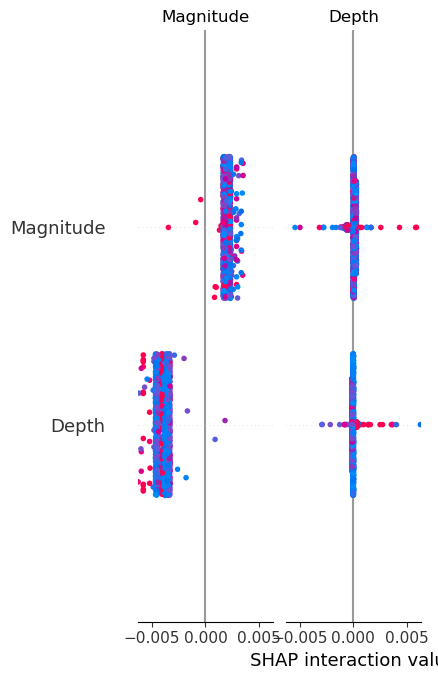


 SHAP Summary Plot for XGBoost


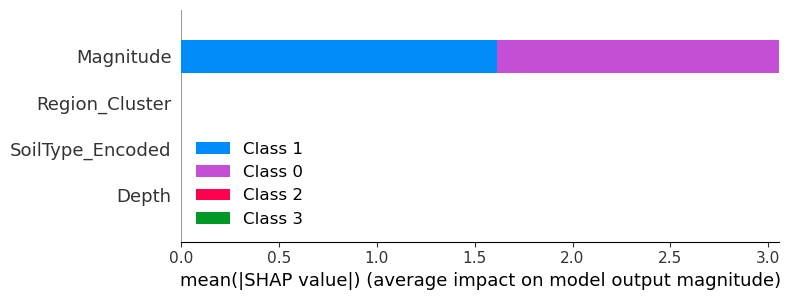

In [44]:
import shap

# For Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

print("\nSHAP Summary Plot for Random Forest")
shap.summary_plot(shap_values_rf, X_test, plot_type="bar")

#  For XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

print("\n SHAP Summary Plot for XGBoost")
shap.summary_plot(shap_values_xgb, X_test, plot_type="bar")

In [45]:
import pandas as pd

summary = pd.DataFrame({
    "Model": ["Random Forest (Tuned)", "XGBoost (Weighted + Tuned)"],
    "Accuracy": [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_xgb)],
    "Macro F1": [
        f1_score(y_test, y_pred_rf, average="macro"),
        f1_score(y_test, y_pred_xgb, average="macro"),
    ]
})

print("\n Final Model Comparison (Day 5):")
print(summary)

summary.to_csv("week5_model_evaluation_summary.csv", index=False)
print("\n Saved as week5_model_evaluation_summary.csv")



 Final Model Comparison (Day 5):
                        Model  Accuracy  Macro F1
0       Random Forest (Tuned)       1.0       1.0
1  XGBoost (Weighted + Tuned)       1.0       1.0

 Saved as week5_model_evaluation_summary.csv
